In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy

In [2]:
# this function is the numerator of the target distribution
# 分子部分
def f(x):
    if x >= 1:
        return np.exp(-(x-1)/2) + np.exp(-(x-1)**2)
    return np.exp((x-1)/3) + np.exp((x-1)**3)

### scipy.integrate.quad

- Integrate func from a to b (possibly infinite interval) using a technique from the Fortran library QUADPACK.

In [4]:
scipy.integrate.quad(f, -np.inf, np.inf)

(6.7792064370220055, 4.513230946064446e-08)

In [6]:
NORMALIZER = scipy.integrate.quad(f, -np.inf, np.inf)[0]
NORMALIZER

6.7792064370220055

### np.trapz

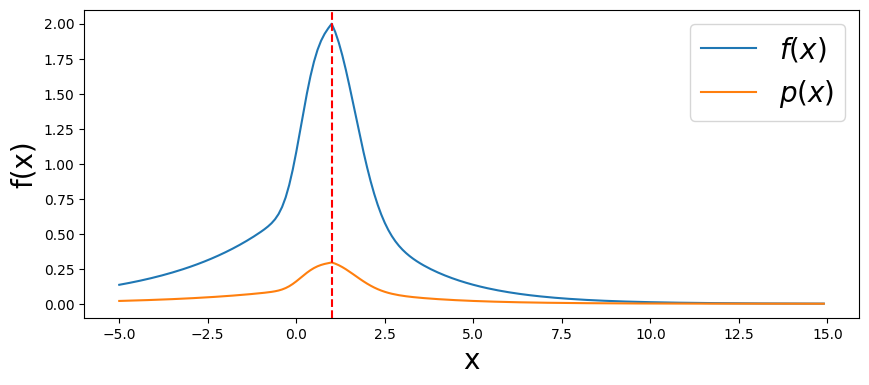

In [7]:
x_vals = np.arange(-5, 15, .1)
f_vals = [f(x) for x in x_vals]
p_vals = [f/NORMALIZER for f in f_vals]

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, p_vals)
plt.legend(['$f(x)$', '$p(x)$'], fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.axvline(1, color='r', linestyle='--')

In [8]:
sum(p_vals)

9.409292472410552

In [9]:
# 基于梯形规则（trapezoidal rule）对离散数据进行积分计算
np.trapz(p_vals, x_vals)

0.9399240121913706

$$
\sum_{a}^bf(x)dx\approx\sum_{i=1}^{n-1}\frac12(x_{i+1}-x_i)\cdot(f(x_{i+1})+f(x_i))
$$

In [10]:
area = 0
for i in range(1, len(x_vals)):
    dx = x_vals[i] - x_vals[i-1]
    area += 0.5 * dx * (p_vals[i] + p_vals[i-1])
area

0.9399240121913707

In [11]:
# 定义标准正态分布的 PDF
def gaussian_pdf(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# 定义积分区间
x = np.linspace(-5, 5, 1000)  # 在 [-5, 5] 区间生成 1000 个点
y = gaussian_pdf(x)          # 计算每个点的 PDF 值

# 使用 np.trapz 进行积分
np.trapz(y, x)

0.9999994265727195